# Project 1: fys-stk4155
## Part a) 
### (Kode fra oppgaveteksten)

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

In [152]:
# Need to make sure this works when y, y_hat and y_tilde are matrices.

# Creating a R2-square fuction:
def R2(y, y_predict):
    C = y-y_predict
    val = sum(sum((y-y_predict))**2)/sum(sum((y-np.mean(y))**2))
    return 1 - val

# Creating a mean square error function:
def MSE(y, y_predict):
    C = y-y_predict
    [n, m] = C.shape
    return sum(sum((C)**2))/(n*m)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4



(20, 20)


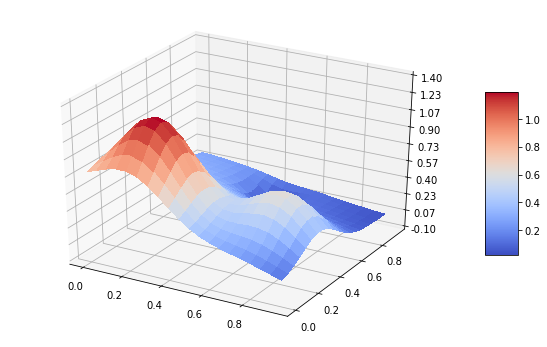

In [158]:
fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

z = FrankeFunction(x, y)
print(z.shape)
# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [172]:
# Initializing X-matrix for fitting a polynomial of degree p 
#x = np.arange(0, 1, 0.05)
#y = np.arange(0, 1, 0.05)
#x, y = np.meshgrid(x,y)

noise = [0, 0.1, 0.15, 0.3]

np.random.seed(1000)
x = np.random.rand(20, ) + noise[-1]*np.random.randn(20,)
y = np.random.rand(20, ) + noise[-1]*np.random.randn(20,)
x, y = np.meshgrid(x,y)
z = FrankeFunction(x, y)

p = 2 # [1:5]
m = int((p**2+3*p+2)/2) # returnerer heltall for p = [1:5]
X = np.zeros((len(x), m))
X[:,0] = 1
counter = 1

x = np.random.rand(20, ) + noise[-1]*np.random.randn(20,)
y = np.random.rand(20, ) + noise[-1]*np.random.randn(20,)

for i in range(1, p+1):
    for j in range(i+1):
        #print(i, j)
        X[:,counter] = x**(i-j) * y**j
        counter+=1
        
z.shapef

(20, 20)

In [173]:
# OLS

# Beta matrix consist of the prediction
#beta = np.linalg.inv(X[:,1:].T.dot(X[:,1:])).dot(X[:,1:].T).dot(z)
beta = np.linalg.inv(X.T @ X)@ X.T @ z
z_predict = X@beta # x dot beta

In [176]:
z.shape, z_predict.shape

((20, 20), (20, 20))

In [177]:
MSE(z, z_predict)

(20, 20)


0.023499339882695137

In [178]:
R2(z, z_predict)

1.0

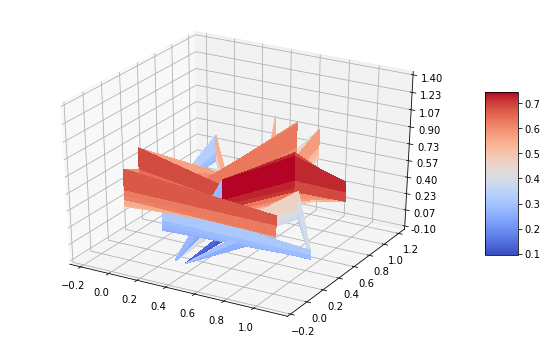

In [180]:

fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(x, y, z_predict, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


# K-fold crossvalidation

In [187]:
k = 4

nrLoops = int(len(x)/k)

test = x[:k]
trening = x[k:]


5

# Bootstrap 